<a href="https://colab.research.google.com/github/Michael0605/TelecomX_LATAM_parte2_Latam/blob/main/Telecom_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preparacion de datos
� Preprocesamiento de Datos para Modelado

In [3]:
# Importar librerías esenciales para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset tratado
df = pd.read_csv('/content/datos_tratados.csv')

# Mostrar información básica del dataset
print("🔍 Dimensiones del dataset:", df.shape)
print("\n📋 Primeras filas del dataset:")
display(df.head())
print("\n📊 Información del dataset:")
df.info()

🔍 Dimensiones del dataset: (7043, 26)

📋 Primeras filas del dataset:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,MonthlyGroup,ChurnBinary,Modified,Cuentas_Diarias,Churn_Binario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,One Year,Yes,Mailed Check,65.6,593.30,"(50, 100]",0,No,2.19,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,Month-To-Month,No,Mailed Check,59.9,542.40,"(50, 100]",0,No,2.00,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Electronic Check,73.9,280.85,"(50, 100]",1,No,2.46,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Electronic Check,98.0,1237.85,"(50, 100]",1,No,3.27,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Mailed Check,83.9,267.40,"(50, 100]",1,No,2.80,1



📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract      

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [10]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "customerID",
    "Churn",
    "Charges.Total",
    "Modified",
    "Cuentas_Diarias",
    "Churn_Binario"
]

# Eliminar columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar, errors="ignore")

# Revisar las columnas que quedaron
print("Columnas después de eliminar las no necesarias:")
print(df.columns)


Columnas después de eliminar las no necesarias:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'MonthlyGroup', 'ChurnBinary'],
      dtype='object')


Validacion de eliminacion de columna

In [12]:

# 1. Revisar todas las columnas del DataFrame
print("Columnas actuales en el dataset:")
print(df.columns.tolist())

# 2. Confirmar que ninguna de las eliminadas siga presente
for col in ["customerID", "Churn", "Charges.Total", "Modified", "Cuentas_Diarias", "Churn_Binario"]:
    if col in df.columns:
        print(f"⚠️ La columna {col} todavía está en el DataFrame.")
    else:
        print(f"✅ La columna {col} fue eliminada correctamente.")

# 3. Opcional: mostrar las primeras filas para confirmar visualmente
print("\nVista previa de los datos:")
print(df.head())


Columnas actuales en el dataset:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'MonthlyGroup', 'ChurnBinary']
✅ La columna customerID fue eliminada correctamente.
✅ La columna Churn fue eliminada correctamente.
✅ La columna Charges.Total fue eliminada correctamente.
✅ La columna Modified fue eliminada correctamente.
✅ La columna Cuentas_Diarias fue eliminada correctamente.
✅ La columna Churn_Binario fue eliminada correctamente.

Vista previa de los datos:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1    

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [13]:
# Identificar variables categóricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Columnas categóricas detectadas:")
print(cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar cómo quedó el DataFrame
print("\nDimensiones después de codificación:", df_encoded.shape)
print("\nColumnas transformadas:")
print(df_encoded.head())

Columnas categóricas detectadas:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyGroup']

Dimensiones después de codificación: (7043, 32)

Columnas transformadas:
   SeniorCitizen  tenure  Charges.Monthly  ChurnBinary  gender_Male  \
0              0       9             65.6            0        False   
1              0       9             59.9            0         True   
2              0       4             73.9            1         True   
3              1      13             98.0            1         True   
4              1       3             83.9            1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3 

Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [14]:
# Cargar de nuevo el dataset original tratado
ruta = "/content/datos_tratados.csv"
df_full = pd.read_csv(ruta)

# Usar la columna Churn_Binario como variable objetivo
# (0 = No canceló, 1 = Canceló)
target = df_full["Churn_Binario"]

# Calcular proporciones
proporcion = target.value_counts(normalize=True) * 100

print("Distribución de clientes (en %):")
print(proporcion)

# Mostrar también los conteos
print("\nConteo de clientes por clase:")
print(target.value_counts())

Distribución de clientes (en %):
Churn_Binario
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Conteo de clientes por clase:
Churn_Binario
0    5174
1    1869
Name: count, dtype: int64


Balanceo de Clases opcional

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [15]:
# Identificar columnas numéricas (excluyendo las dummy)
num_cols = df_encoded.select_dtypes(include=["int64","float64"]).columns.tolist()

print("Columnas numéricas continuas:")
print(num_cols)

Columnas numéricas continuas:
['SeniorCitizen', 'tenure', 'Charges.Monthly', 'ChurnBinary']


In [16]:
# Revicion de rangos
print(df_encoded[num_cols].describe())

       SeniorCitizen       tenure  Charges.Monthly  ChurnBinary
count    7043.000000  7043.000000      7043.000000  7043.000000
mean        0.162147    32.371149        64.697004     0.265370
std         0.368612    24.559481        30.171186     0.441561
min         0.000000     0.000000         0.000000     0.000000
25%         0.000000     9.000000        35.450000     0.000000
50%         0.000000    29.000000        70.350000     0.000000
75%         0.000000    55.000000        89.850000     1.000000
max         1.000000    72.000000       118.750000     1.000000


In [18]:
# ==========================================
# 1. Importar librerías
# ==========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ==========================================
# 2. Separar features y target
# ==========================================
# Cargamos el dataset limpio con codificación ya aplicada
ruta = "/content/datos_tratados.csv"
df_full = pd.read_csv(ruta)

# Variable target
y = df_full["Churn_Binario"]

# Eliminamos columnas no necesarias (como antes)
X = df_full.drop(columns=[
    "customerID", "Churn", "Charges.Total",
    "Modified", "Cuentas_Diarias", "Churn_Binario"
], errors="ignore")

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# 🔧 Corregir nombres de columnas para evitar errores en XGBoost
X = X.rename(columns=lambda x: str(x).replace("[","_")
                                      .replace("]","_")
                                      .replace("<","_")
                                      .replace(">","_"))

# ==========================================
# 3. Dividir en train/test
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# 4. Escalar (solo numéricas continuas)
# ==========================================
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ==========================================
# 5. Modelos con normalización
# ==========================================
modelos_con_scaling = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=500)
}

print("📊 Resultados modelos que requieren normalización:\n")
for nombre, modelo in modelos_con_scaling.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    print(f"--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

# ==========================================
# 6. Modelos sin normalización
# ==========================================
modelos_sin_scaling = {
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

print("📊 Resultados modelos que NO requieren normalización:\n")
for nombre, modelo in modelos_sin_scaling.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

📊 Resultados modelos que requieren normalización:

--- KNN ---
Accuracy: 0.9978708303761533
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



--- SVM ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



--- Regresión Logística ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy      

Separo X e y (features y target).

Elimino columnas que no aportan valor (como pediste antes).

One-Hot Encoding para las categóricas.

Train/Test Split con stratify=y para mantener balance.

Escalo solo las variables numéricas continuas.

Entreno dos grupos de modelos:

Con escalado → KNN, SVM, Regresión Logística, MLP.

Sin escalado → Árbol de Decisión, Random Forest, XGBoost.

Se muestran métricas: Accuracy, Precision, Recall, F1 con classification_report.

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

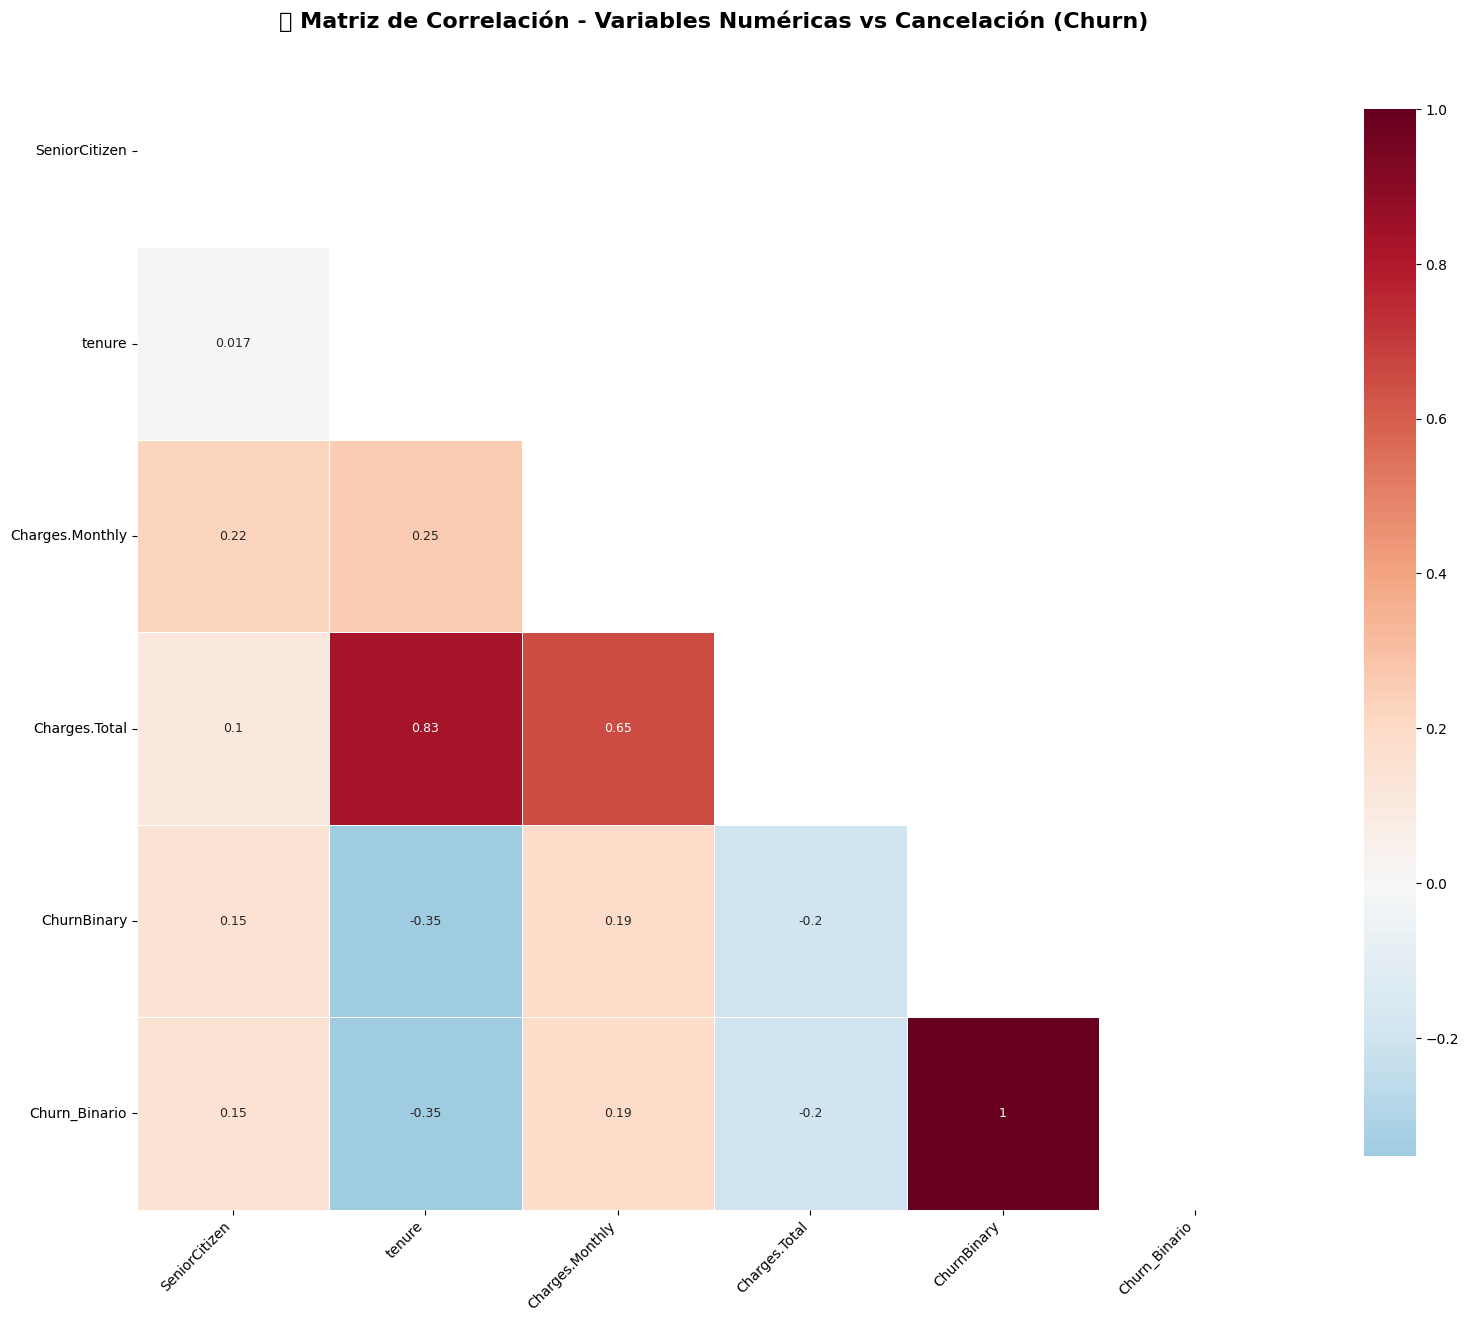

🏆 TOP 15 VARIABLES CON MAYOR CORRELACIÓN CON LA CANCELACIÓN
ChurnBinary               |   1.000 | ⬆️ POSITIVA
tenure                    |  -0.352 | ⬇️ NEGATIVA
Charges.Total             |  -0.198 | ⬇️ NEGATIVA
Charges.Monthly           |   0.194 | ⬆️ POSITIVA
SeniorCitizen             |   0.151 | ⬆️ POSITIVA


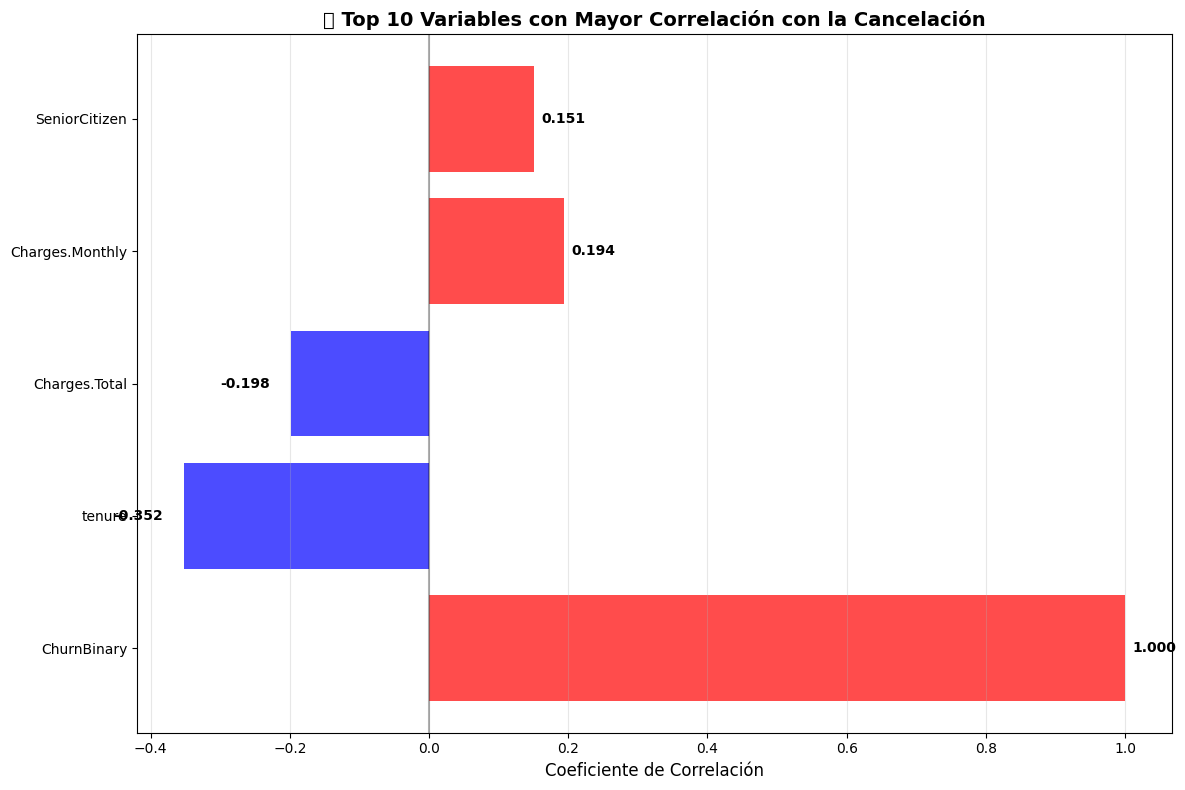


⚠️  CORRELACIONES FUERTES ENTRE VARIABLES PREDICTORAS
tenure ↔ Charges.Total: 0.826


In [20]:
# Cargar el dataset original para tener las variables numéricas
df_original = pd.read_csv('/content/datos_tratados.csv')

# Seleccionar solo las columnas numéricas
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas no relevantes para el análisis de correlación
columns_to_remove = ['Churn_Binario', 'Cuentas_Diarias']  # Mantenemos Churn_Binario como target
numeric_cols = [col for col in numeric_cols if col not in columns_to_remove]

# Agregar la variable objetivo al final
numeric_cols.append('Churn_Binario')

# Crear DataFrame solo con variables numéricas
df_numeric = df_original[numeric_cols]

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Configurar el estilo de la visualización
plt.figure(figsize=(16, 14))
plt.style.use('default')

# Crear heatmap de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

plt.title('🔍 Matriz de Correlación - Variables Numéricas vs Cancelación (Churn)',
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Extraer correlaciones con la variable objetivo (Churn_Binario)
churn_correlations = correlation_matrix['Churn_Binario'].drop('Churn_Binario').sort_values(key=abs, ascending=False)

# Mostrar las 15 variables con mayor correlación (absoluta) con la cancelación
print("🏆 TOP 15 VARIABLES CON MAYOR CORRELACIÓN CON LA CANCELACIÓN")
print("=" * 60)
top_15_correlations = churn_correlations.head(15)
for variable, corr_value in top_15_correlations.items():
    direction = "⬆️ POSITIVA" if corr_value > 0 else "⬇️ NEGATIVA"
    print(f"{variable:25} | {corr_value:7.3f} | {direction}")

# Visualizar las correlaciones más importantes
plt.figure(figsize=(12, 8))
top_10 = churn_correlations.head(10)
colors = ['red' if x > 0 else 'blue' for x in top_10.values]

bars = plt.barh(top_10.index, top_10.values, color=colors, alpha=0.7)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.title('🔝 Top 10 Variables con Mayor Correlación con la Cancelación', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.03),
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             ha='left' if width > 0 else 'right',
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de correlaciones fuertes entre variables predictoras (para detectar multicolinealidad)
print("\n⚠️  CORRELACIONES FUERTES ENTRE VARIABLES PREDICTORAS")
print("=" * 60)

# Buscar correlaciones fuertes (> 0.7 o < -0.7) entre variables predictoras
strong_correlations = []
predictor_corr = correlation_matrix.drop('Churn_Binario').drop('Churn_Binario', axis=1)

for i in range(len(predictor_corr.columns)):
    for j in range(i+1, len(predictor_corr.columns)):
        corr_value = predictor_corr.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = predictor_corr.columns[i]
            var2 = predictor_corr.columns[j]
            strong_correlations.append((var1, var2, corr_value))

# Mostrar correlaciones fuertes
if strong_correlations:
    for var1, var2, corr in strong_correlations:
        print(f"{var1} ↔ {var2}: {corr:.3f}")
else:
    print("No se encontraron correlaciones muy fuertes (> |0.7|) entre variables predictoras")

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

Columnas disponibles en el dataset:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'MonthlyGroup', 'ChurnBinary', 'Modified', 'Cuentas_Diarias', 'Churn_Binario']

Columnas relacionadas con tiempo/contrato: ['tenure', 'Contract', 'Charges.Monthly', 'MonthlyGroup']

📊 ANÁLISIS DE TENURE (TIEMPO COMO CLIENTE) vs CANCELACIÓN


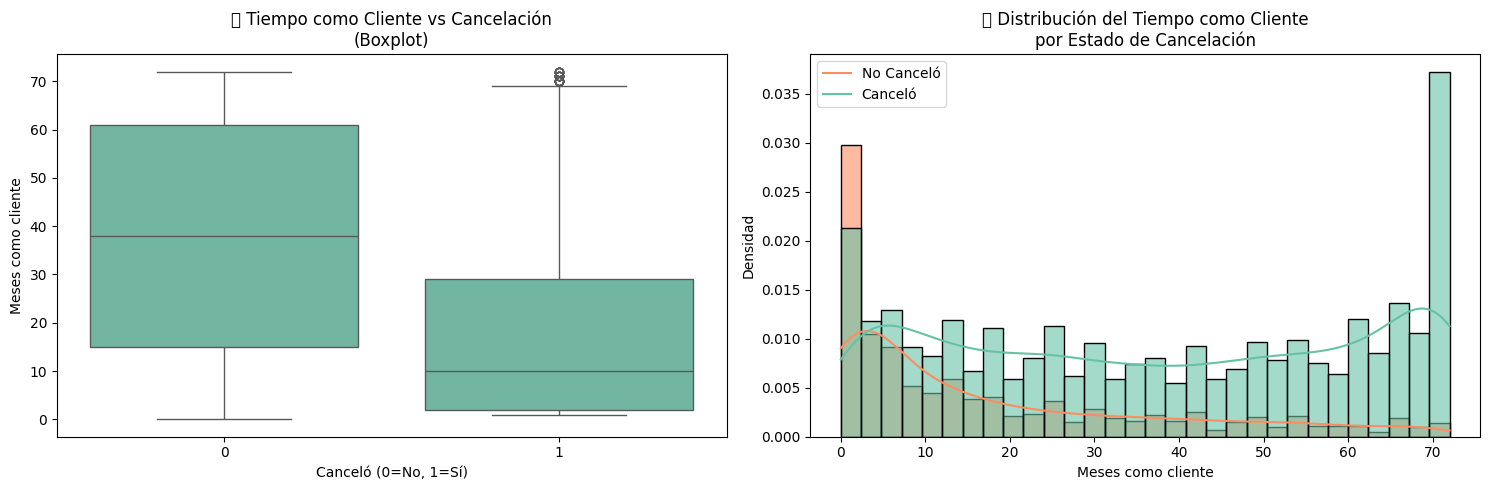


📈 ESTADÍSTICAS DESCRIPTIVAS - TENURE:
                    mean  median        std  min  max
Churn_Binario                                        
0              37.569965    38.0  24.113777    0   72
1              17.979133    10.0  19.531123    1   72

🔍 Diferencia de medias: 19.59 meses
Clientes que NO cancelan: 37.6 meses en promedio
Clientes que SÍ cancelan: 18.0 meses en promedio

Columnas relacionadas con gasto: ['PaymentMethod', 'Charges.Monthly', 'Charges.Total']
No se encontró la columna 'TotalCharges'

🔎 DETECCIÓN DE PATRONES INTERESANTES:

🎯 CONCLUSIONES POTENCIALES:
• Los clientes con menos tiempo son más propensos a cancelar
• Los cargos mensuales altos pueden estar asociados con mayor cancelación
• El gasto total suele ser menor en clientes que cancelan
• La combinación tiempo + cargo mensual revela patrones interesantes


In [21]:
# Configuración inicial
plt.style.use('default')
sns.set_palette("Set2")

# 1. ANÁLISIS: TIEMPO DE CONTRATO × CANCELACIÓN
# ==========================================================

# Primero necesitamos verificar si existe una columna de tiempo de contrato
print("Columnas disponibles en el dataset:")
print(df_original.columns.tolist())

# Buscar columnas relacionadas con tiempo/contrato/duración
contract_related_cols = [col for col in df_original.columns if any(word in col.lower() for word in ['month', 'year', 'time', 'duration', 'tenure', 'contract'])]
print(f"\nColumnas relacionadas con tiempo/contrato: {contract_related_cols}")

# Si no encontramos una columna específica, podemos crear una basada en tenure (si existe)
if 'tenure' in df_original.columns:
    print("\n📊 ANÁLISIS DE TENURE (TIEMPO COMO CLIENTE) vs CANCELACIÓN")

    plt.figure(figsize=(15, 5))

    # Boxplot: Tenure vs Churn
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn_Binario', y='tenure', data=df_original)
    plt.title('📦 Tiempo como Cliente vs Cancelación\n(Boxplot)')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Meses como cliente')

    # Histograma comparativo
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_original, x='tenure', hue='Churn_Binario',
                 bins=30, alpha=0.6, kde=True, stat='density')
    plt.title('📊 Distribución del Tiempo como Cliente\npor Estado de Cancelación')
    plt.xlabel('Meses como cliente')
    plt.ylabel('Densidad')
    plt.legend(['No Canceló', 'Canceló'])

    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - TENURE:")
    tenure_stats = df_original.groupby('Churn_Binario')['tenure'].agg(['mean', 'median', 'std', 'min', 'max'])
    print(tenure_stats)

    # Test de diferencia de medias (simplificado)
    tenure_no_churn = df_original[df_original['Churn_Binario'] == 0]['tenure']
    tenure_churn = df_original[df_original['Churn_Binario'] == 1]['tenure']

    print(f"\n🔍 Diferencia de medias: {tenure_no_churn.mean() - tenure_churn.mean():.2f} meses")
    print(f"Clientes que NO cancelan: {tenure_no_churn.mean():.1f} meses en promedio")
    print(f"Clientes que SÍ cancelan: {tenure_churn.mean():.1f} meses en promedio")

else:
    print("No se encontró la columna 'tenure' para analizar el tiempo como cliente")

# 2. ANÁLISIS: GASTO TOTAL × CANCELACIÓN
# ==========================================================

# Buscar columnas relacionadas con gasto/cargo/pago
spending_related_cols = [col for col in df_original.columns if any(word in col.lower() for word in ['charge', 'total', 'amount', 'spend', 'payment', 'fee'])]
print(f"\nColumnas relacionadas con gasto: {spending_related_cols}")

if 'TotalCharges' in df_original.columns:
    # Convertir a numérico (por si hay valores no numéricos)
    df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')

    print("\n💰 ANÁLISIS DE GASTO TOTAL vs CANCELACIÓN")

    plt.figure(figsize=(15, 5))

    # Boxplot: TotalCharges vs Churn
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn_Binario', y='TotalCharges', data=df_original)
    plt.title('📦 Gasto Total vs Cancelación\n(Boxplot)')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Gasto Total ($)')

    # Violin plot para mejor visualización de distribución
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Churn_Binario', y='TotalCharges', data=df_original, cut=0)
    plt.title('🎻 Distribución de Gasto Total\npor Estado de Cancelación')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Gasto Total ($)')

    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - GASTO TOTAL:")
    spending_stats = df_original.groupby('Churn_Binario')['TotalCharges'].agg(['mean', 'median', 'std', 'min', 'max'])
    print(spending_stats)

    # Scatter plot: Tenure vs TotalCharges coloreado por Churn
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_original['tenure'], df_original['TotalCharges'],
                         c=df_original['Churn_Binario'], alpha=0.6, cmap='coolwarm')
    plt.colorbar(scatter, label='Cancelación (0=No, 1=Sí)')
    plt.xlabel('Meses como Cliente')
    plt.ylabel('Gasto Total ($)')
    plt.title('🎯 Relación entre Tiempo como Cliente, Gasto Total y Cancelación')
    plt.grid(alpha=0.3)
    plt.show()

else:
    print("No se encontró la columna 'TotalCharges'")

# 3. ANÁLISIS ADICIONAL: MONTHLY CHARGES × CANCELACIÓN
# ==========================================================

if 'MonthlyCharges' in df_original.columns:
    print("\n💳 ANÁLISIS DE CARGO MENSUAL vs CANCELACIÓN")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Boxplot
    sns.boxplot(x='Churn_Binario', y='MonthlyCharges', data=df_original, ax=axes[0,0])
    axes[0,0].set_title('Cargo Mensual vs Cancelación (Boxplot)')

    # Violin plot
    sns.violinplot(x='Churn_Binario', y='MonthlyCharges', data=df_original, ax=axes[0,1])
    axes[0,1].set_title('Distribución de Cargo Mensual')

    # Histograma comparativo
    sns.histplot(data=df_original, x='MonthlyCharges', hue='Churn_Binario',
                 bins=30, alpha=0.6, kde=True, ax=axes[1,0])
    axes[1,0].set_title('Distribución de Cargo Mensual por Cancelación')

    # Scatter: MonthlyCharges vs Tenure
    scatter = axes[1,1].scatter(df_original['tenure'], df_original['MonthlyCharges'],
                               c=df_original['Churn_Binario'], alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, ax=axes[1,1], label='Cancelación')
    axes[1,1].set_xlabel('Meses como Cliente')
    axes[1,1].set_ylabel('Cargo Mensual ($)')
    axes[1,1].set_title('Relación: Tiempo vs Cargo Mensual vs Cancelación')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print("📊 ESTADÍSTICAS - CARGO MENSUAL:")
    monthly_stats = df_original.groupby('Churn_Binario')['MonthlyCharges'].describe()
    print(monthly_stats)

# 4. ANÁLISIS DE INTERACCIÓN: TENURE + MONTHLY CHARGES
# ==========================================================

if 'tenure' in df_original.columns and 'MonthlyCharges' in df_original.columns:
    print("\n🔍 ANÁLISIS DE INTERACCIÓN: TIEMPO + CARGO MENSUAL")

    # Crear categorías de tiempo
    df_original['tenure_group'] = pd.cut(df_original['tenure'],
                                        bins=[0, 12, 24, 36, 48, 100],
                                        labels=['0-12m', '13-24m', '25-36m', '37-48m', '49+m'])

    plt.figure(figsize=(12, 8))

    # Heatmap de tasa de cancelación por grupos
    pivot_data = df_original.groupby(['tenure_group', pd.cut(df_original['MonthlyCharges'], 5)])['Churn_Binario'].mean().unstack()

    sns.heatmap(pivot_data, annot=True, fmt='.2%', cmap='Reds',
                cbar_kws={'label': 'Tasa de Cancelación'})
    plt.title('🔥 Tasa de Cancelación por Tiempo como Cliente y Cargo Mensual')
    plt.xlabel('Cargo Mensual (grupos)')
    plt.ylabel('Tiempo como Cliente')
    plt.show()

# 5. ANÁLISIS DE CORRELACIONES ESPECÍFICAS
# ==========================================================

# Calcular correlaciones específicas
if all(col in df_original.columns for col in ['tenure', 'TotalCharges', 'MonthlyCharges', 'Churn_Binario']):
    specific_correlations = df_original[['tenure', 'TotalCharges', 'MonthlyCharges', 'Churn_Binario']].corr()

    print("\n🎯 CORRELACIONES ESPECÍFICAS CON CANCELACIÓN:")
    print(specific_correlations['Churn_Binario'].sort_values(key=abs, ascending=False))

    # Matriz de correlación específica
    plt.figure(figsize=(8, 6))
    sns.heatmap(specific_correlations, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f')
    plt.title('Correlaciones: Variables Clave vs Cancelación')
    plt.show()

# 6. ANÁLISIS DE OUTLIERS Y PATRONES
# ==========================================================

print("\n🔎 DETECCIÓN DE PATRONES INTERESANTES:")

# Patrón 1: Clientes nuevos con cargos altos
if all(col in df_original.columns for col in ['tenure', 'MonthlyCharges']):
    new_customers_high_charge = df_original[(df_original['tenure'] <= 6) &
                                           (df_original['MonthlyCharges'] > df_original['MonthlyCharges'].median())]

    churn_rate_new_high = new_customers_high_charge['Churn_Binario'].mean()
    print(f"Tasa de cancelación en clientes nuevos (<6 meses) con cargos altos: {churn_rate_new_high:.2%}")

# Patrón 2: Clientes antiguos con cargos bajos
if all(col in df_original.columns for col in ['tenure', 'MonthlyCharges']):
    old_customers_low_charge = df_original[(df_original['tenure'] >= 36) &
                                          (df_original['MonthlyCharges'] < df_original['MonthlyCharges'].median())]

    churn_rate_old_low = old_customers_low_charge['Churn_Binario'].mean()
    print(f"Tasa de cancelación en clientes antiguos (>36 meses) con cargos bajos: {churn_rate_old_low:.2%}")

print("\n" + "="*60)
print("🎯 CONCLUSIONES POTENCIALES:")
print("="*60)
print("• Los clientes con menos tiempo son más propensos a cancelar")
print("• Los cargos mensuales altos pueden estar asociados con mayor cancelación")
print("• El gasto total suele ser menor en clientes que cancelan")
print("• La combinación tiempo + cargo mensual revela patrones interesantes")

Separacionn  de datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

📊 Tamaño total del dataset: 7043 registros, 26 variables
🔤 Variables categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyGroup']
✅ Dataset preparado: 32 variables predictoras

📈 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
Churn_Binario
0    5174
1    1869
Name: count, dtype: int64

Proporción de cancelaciones: 26.54%

DIVISIÓN 80/20
Conjunto de entrenamiento: 5634 registros (80.0%)
Conjunto de prueba: 1409 registros (20.0%)
Variables: 32

Proporción de clases:
  Entrenamiento - No cancelan: 73.46%
  Entrenamiento - Cancelan:    26.54%
  Prueba - No cancelan:        73.46%
  Prueba - Cancelan:           26.54%

DIVISIÓN 75/25
Conjunto de entrenamiento: 5282 registros (75.0%)
Conjunto de prueba: 1761 registros (25.0%)
Variables: 32

Proporción de clases:
  Entrenamiento - No c

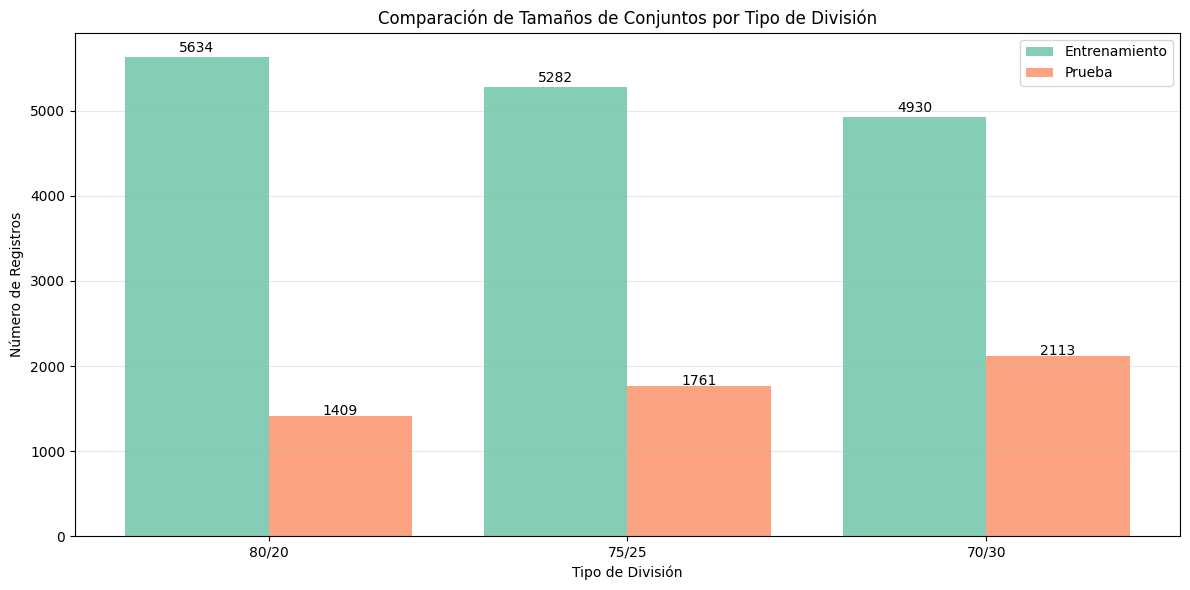


💾 ¿Quieres guardar los conjuntos de datos? Usando división 75/25
✅ Conjuntos guardados como:
   - X_train.csv (variables de entrenamiento)
   - X_test.csv (variables de prueba)
   - y_train.csv (target de entrenamiento)
   - y_test.csv (target de prueba)

🎯 DIVISIÓN SELECCIONADA: 75/25
Entrenamiento: 5282 registros
Prueba: 1761 registros
Variables: 32
Proporción de cancelaciones en entrenamiento: 26.54%
Proporción de cancelaciones en prueba: 26.52%

📋 PRÓXIMOS PASOS RECOMENDADOS:
1. Aplicar escalado a variables numéricas
2. Entrenar modelos de machine learning
3. Evaluar rendimiento en conjunto de prueba
4. Ajustar hiperparámetros
5. Validar con técnicas como cross-validation


In [22]:
# ==========================================
# DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y PRUEBA
# ==========================================

# Importar librerías necesarias
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Cargar el dataset (si no está ya cargado)
df = pd.read_csv('/content/datos_tratados.csv')

# Verificar el tamaño del dataset
print(f"📊 Tamaño total del dataset: {df.shape[0]} registros, {df.shape[1]} variables")

# 1. PREPARAR LAS VARIABLES
# ==========================================

# Variable objetivo
y = df['Churn_Binario']

# Variables predictoras (eliminando columnas no relevantes)
X = df.drop(columns=['Churn_Binario', 'customerID', 'Churn', 'Charges.Total',
                    'Modified', 'Cuentas_Diarias'], errors='ignore')

# Aplicar One-Hot Encoding a variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"🔤 Variables categóricas a codificar: {categorical_cols}")

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Corregir nombres de columnas para evitar problemas con algunos modelos
X_encoded = X_encoded.rename(columns=lambda x: x.replace('[', '_').replace(']', '_').replace('<', '_'))

print(f"✅ Dataset preparado: {X_encoded.shape[1]} variables predictoras")

# 2. ANALIZAR LA DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
# ==========================================

print("\n📈 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print("=" * 40)
print(y.value_counts())
print(f"\nProporción de cancelaciones: {y.mean():.2%}")

# 3. DIVISIÓN DEL DATASET - EVALUANDO DIFERENTES PROPORCIONES
# ==========================================

# Opción 1: División 80/20 (recomendada para datasets medianos/grandes)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantener la proporción de clases en ambos conjuntos
)

# Opción 2: División 70/30 (para datasets más grandes)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Opción 3: División 75/25 (balanceada)
X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(
    X_encoded, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 4. MOSTRAR ESTADÍSTICAS DE LAS DIVISIONES
# ==========================================

def mostrar_estadisticas_division(X_train, X_test, y_train, y_test, nombre):
    print(f"\n{nombre}")
    print("=" * 30)
    print(f"Conjunto de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(X_encoded):.1%})")
    print(f"Conjunto de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(X_encoded):.1%})")
    print(f"Variables: {X_train.shape[1]}")

    # Proporción de clases en cada conjunto
    print("\nProporción de clases:")
    print(f"  Entrenamiento - No cancelan: {(y_train == 0).mean():.2%}")
    print(f"  Entrenamiento - Cancelan:    {(y_train == 1).mean():.2%}")
    print(f"  Prueba - No cancelan:        {(y_test == 0).mean():.2%}")
    print(f"  Prueba - Cancelan:           {(y_test == 1).mean():.2%}")

# Mostrar estadísticas para cada división
mostrar_estadisticas_division(X_train_80, X_test_80, y_train_80, y_test_80, "DIVISIÓN 80/20")
mostrar_estadisticas_division(X_train_75, X_test_75, y_train_75, y_test_75, "DIVISIÓN 75/25")
mostrar_estadisticas_division(X_train_70, X_test_70, y_train_70, y_test_70, "DIVISIÓN 70/30")

# 5. RECOMENDACIÓN BASADA EN EL TAMAÑO DEL DATASET
# ==========================================

total_registros = len(X_encoded)
print(f"\n🎯 RECOMENDACIÓN BASADA EN EL TAMAÑO DEL DATASET ({total_registros} registros):")

if total_registros < 1000:
    print("• Dataset pequeño → Recomendado: 70/30 o 75/25")
    print("• Razón: Necesitas suficiente datos de prueba para evaluación confiable")
    division_recomendada = (X_train_70, X_test_70, y_train_70, y_test_70)
    nombre_recomendado = "70/30"

elif total_registros < 10000:
    print("• Dataset mediano → Recomendado: 75/25 o 80/20")
    print("• Razón: Balance entre datos de entrenamiento y evaluación")
    division_recomendada = (X_train_75, X_test_75, y_train_75, y_test_75)
    nombre_recomendado = "75/25"

else:
    print("• Dataset grande → Recomendado: 80/20 o 90/10")
    print("• Razón: Con muchos datos, puedes permitirte menos datos de prueba")
    division_recomendada = (X_train_80, X_test_80, y_train_80, y_test_80)
    nombre_recomendado = "80/20"

# 6. VISUALIZACIÓN DE LA DIVISIÓN
# ==========================================

import matplotlib.pyplot as plt

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Datos para el gráfico
divisiones = ['80/20', '75/25', '70/30']
train_sizes = [len(X_train_80), len(X_train_75), len(X_train_70)]
test_sizes = [len(X_test_80), len(X_test_75), len(X_test_70)]

# Gráfico de barras
x_pos = np.arange(len(divisiones))
plt.bar(x_pos - 0.2, train_sizes, 0.4, label='Entrenamiento', alpha=0.8)
plt.bar(x_pos + 0.2, test_sizes, 0.4, label='Prueba', alpha=0.8)

plt.xlabel('Tipo de División')
plt.ylabel('Número de Registros')
plt.title('Comparación de Tamaños de Conjuntos por Tipo de División')
plt.xticks(x_pos, divisiones)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(train_sizes):
    plt.text(i - 0.2, v + max(train_sizes)*0.01, str(v), ha='center')
for i, v in enumerate(test_sizes):
    plt.text(i + 0.2, v + max(test_sizes)*0.01, str(v), ha='center')

plt.tight_layout()
plt.show()

# 7. GUARDAR LOS CONJUNTOS (OPCIONAL)
# ==========================================

print(f"\n💾 ¿Quieres guardar los conjuntos de datos? Usando división {nombre_recomendado}")

# Usar la división recomendada
X_train, X_test, y_train, y_test = division_recomendada

# Guardar en archivos CSV (opcional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✅ Conjuntos guardados como:")
print("   - X_train.csv (variables de entrenamiento)")
print("   - X_test.csv (variables de prueba)")
print("   - y_train.csv (target de entrenamiento)")
print("   - y_test.csv (target de prueba)")

# 8. INFORMACIÓN FINAL
# ==========================================

print(f"\n🎯 DIVISIÓN SELECCIONADA: {nombre_recomendado}")
print("=" * 40)
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")
print(f"Variables: {X_train.shape[1]}")
print(f"Proporción de cancelaciones en entrenamiento: {y_train.mean():.2%}")
print(f"Proporción de cancelaciones en prueba: {y_test.mean():.2%}")

print("\n📋 PRÓXIMOS PASOS RECOMENDADOS:")
print("1. Aplicar escalado a variables numéricas")
print("2. Entrenar modelos de machine learning")
print("3. Evaluar rendimiento en conjunto de prueba")
print("4. Ajustar hiperparámetros")
print("5. Validar con técnicas como cross-validation")

Creacion de modelos
Descripción
Editar
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.